<a href="https://colab.research.google.com/github/juangross/cursoPDI2021/blob/main/PDI_TP8_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementar un aplicativo que permita abrir una imagen y con esta obtener:


• Downsampling X2 (mostrando la imagen resultado al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.


• Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.


• Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.
Todas las funciones de Downsamplig, Upsampling y Cuantización deben ser desarrolladas como funciones propias y NO con funciones de biblioteca. Les sugiero recorrer la imagen mediante ciclos for anidados para una fácil implementación.
Fecha de entrega: 08 de Dicembre. 

bloque 1 - descarga de imágenes

In [ ]:
#importo material de trabajo
!git clone https://github.com/juangross/cursoPDI2021

Cloning into 'cursoPDI2021'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (259/259), done.
remote: Total 261 (delta 79), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (261/261), 40.79 MiB | 10.03 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [ ]:
#@title
import matplotlib.pyplot as plt
import imageio as img
import numpy as np
from scipy import fftpack
import fnmatch
import os


#transformo a 
def RGB_TO_YIQ(RGBImage ):
  #matriz de conversión de RGB -> YIQ
  RGB2YIQ=np.array([[0.299,0.587,0.114],
                    [0.595716,-0.274453,-0.321263],
                    [0.211456,-0.522591,0.311135]], dtype=float)

  #me baso en esta explicación del producto matricial para hacer la conversión de bases
  #https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
  YIQ_image=np.zeros(RGBImage.shape, dtype=float)
  YIQ_image=np.dot(RGBImage,RGB2YIQ.T.copy())
  return YIQ_image


def leerIMG(archivo):

  #Lee imagen con el formato actual
  imagen=(img.imread(f"{path}{archivo}.{ext}"))      #lee con imageio

  #imagen=imagen.astype('float')/255 #normalizo
  #imagen=np.clip(imagen,0.,1.)  #recorto los valores extremos al rango [0:1] 
  print("leyendo archivo:", f"{path}{archi}.{ext}", imagen.shape)
  #plt.imshow( imagen)

  #print("valor máximo: ",np.max(imagen))
  return  imagen



bloque 3 - cargo imagen.

iamgenes en grayscale= devuelve la imagen


imagen RGB: convierto q YIQ y devuelve sólo el canal Y

leyendo archivo: ./cursoPDI2021/imagenes/chip1r.png (302, 574, 3)
Archivo, dimension:  chip1r (302, 574, 3)
valor máximo:  160.088


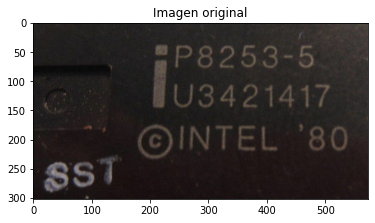

In [ ]:
path="./cursoPDI2021/imagenes/"
ext="png"

#Procurar buscar imágenes que tengan el mismo tamaño
archi = "chip1r" #@param [ 'Philips_PM5544.svg320','Philips_PM5544.svg640', '320px-RCA_Indian_Head_Test_Pattern.svg320', '640px-RCA_Indian_Head_Test_Pattern.svg','chip1r','chip2','chip3-gray', 'plantaciones1', 'mac_atrofica','mac_subatr']

imagen=leerIMG(archi)

print("Archivo, dimension: ", archi, imagen.shape)

if (len(imagen.shape) >2):
  #la imagen tiene mas de 1 canal.
  #img2=imagen.astype('float')//255 #normalizo
  #img3=np.clip(img2,0.,1.)  #recorto los valores extremos al rango [0:1] 

  imagen_yiq=RGB_TO_YIQ(imagen)
  #print("Canales: ", imagen_yiq.shape)
  img=imagen_yiq[:,:,0]

else:
  #tiene un sólo canal
  img=imagen

print("valor máximo: ",np.max(img))
plt.title("Imagen original")
plt.imshow( imagen.astype('uint8') )



bloque 4 - procesamiento

downscale(imagen):  (302, 574)
Lienzo:  (151, 287)


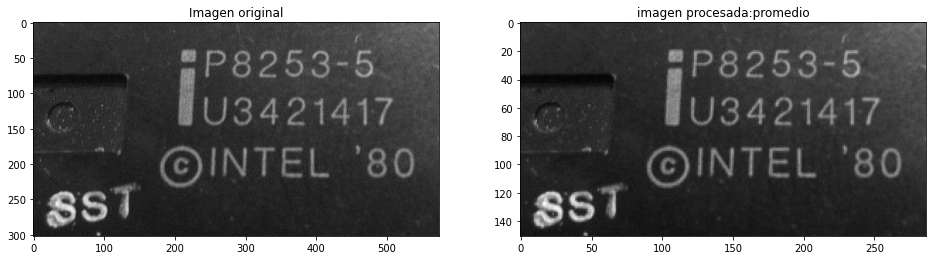

In [ ]:
def downscale(img, tipo= "constante"):
  tam= img.shape
  print("downscale(imagen): ", tam)
  
  
  ajustex=tam[0]%2
  ajustey=tam[1]%2
  lienzox=tam[0]//2+ajustex
  lienzoy=tam[1]//2+ajustey
  #print("tamaño lienzo:", (tam[0]//2+ajustex) ,(tam[1]//2+ajustey))
  #defino lienzo en blanco cuyo tamaño es la mitad que el de la imagen.
  lienzo=np.zeros((lienzox,lienzoy),dtype=img.dtype)
  print("Lienzo: ", lienzo.shape)

  if tipo=='constante':
    for i in range(0,lienzox):
      for j in range(0,lienzoy):
#       el escalado es simplemente copiar en el lienzo
#        1 pixel de cada 2 pixels de la imagen original
        lienzo[i,j]=img[i*2,j*2]

  elif tipo=='promedio':
#   hago el reescalado tomando un kernel de 2x2 y calculo el promedio.
#   el valor del promedio es el valor resultado escalado
#promedio entre las 4 muestra
#usando un slice de la imagen
    kernel=0.25* np.array([[1,1],
                      [1,1]])
    kx=kernel.shape[0] #ancho del kernel
    ky=kernel.shape[0] #alto del kernel

    for i in range(0,lienzox):
      for j in range(0,lienzoy):
        ven= img[i*2:i*2+kx,j*2:j*2+ky]
        lienzo[i,j]=np.mean(ven)
#       calculo manusl
#        lienzo[i,j]=.25*(img[i*2,j*2]+
#                         img[i*2+1,j*2]+
#                         img[i*2,j*2+1]+
#                         img[i*2+1,j*2+1])
  elif tipo=='bilineal':
    #se puede hacer sin el kernel y ventana, pero lo dejo así por legibilidad
    kernel=np.array([[1,1],
                      [1,1]])
    kx=kernel.shape[0] #ancho del kernel
    ky=kernel.shape[0] #alto del kernel
    for i in range(0,lienzox-kx,kx):
      for j in range(0,lienzoy-ky,ky):
        lienzo[i,j]=img[i*2,j*2]
        ven= img[i*2:i*2+kx,j*2:j*2]
        lienzo[i+1,j]=0.5*np.sum(ven)
        #lienzo[i+1,j]=(img[i*2,j*2]+img[i*2+1,j*2])//2 #promedio de la fila
        ven= img[i*2:i*2,j*2:j*2+ky]
        lienzo[i,j+1]=0.5*np.sum(ven)
        #lienzo[i,j+1]=(img[i*2,j*2]+img[i*2,j*2+1])//2 #promedio de la columna
        ven= img[i*2:i*2+kx,j*2:j*2+ky]
        lienzo[i+1,j+1]= 0.25* np.sum(ven) #promedio de la ventana

  elif tipo=='bicubica':
    kernel=0.25* np.array([[1,1,1,1],
                          [1,1,1,1],
                          [1,1,1,1],
                          [1,1,1,1]])
    pad=np.zeros(img.shape[1])
    aux=img
    


    for i in range(kx,img.shape[0]-kx,1):
        for j in range(ky, img.shape[1]-ky,1):
              ven=img[i-kx:i+kx-1,    j-ky:j+ky-1]
              lienzo[i,j]=np.sum(np.multiply(ven, kernel ))
              


  return lienzo



op = "downscale" #@param [ 'downscale', 'upscale']
tipo = "promedio" #@param [ 'constante', 'lineal', 'bilineal','promedio']


if op== "downscale":  res=downscale(img, tipo)  



fig, axs = plt.subplots(1, 2, tight_layout=False,figsize=(16,16))
axs[0].imshow(img.astype('uint8'),cmap= 'gray')
axs[0].set_title("Imagen original")
axs[1].imshow( res.astype('uint8'),cmap='gray')
axs[1].set_title("imagen procesada:%s" % str(tipo))
plt.show()


In [ ]:
#@title
import numpy as np
kernel= np.array([[1,1,1,1],
                      [1,1,1,1],
                      [1,1,1,1],
                      [1,1,1,1]])


#padimage(): agrega un padding de ceros alrededor de una imagen, de ancho igual al kernel/2
def padimage(imagen, kernel):
  padh=(np.zeros(imagen.shape[0]))
  print (kernel.shape[1]%2)
  if (kernel.shape[1]%2==1):
    padv=(np.zeros(imagen.shape[1]+kernel.shape[1]-1))
  else:
    padv=(np.zeros(imagen.shape[1]+(kernel.shape[1])+kernel.shape[1]%2))
  padh = np.expand_dims(padh, axis=0)
  padv = np.expand_dims(padv, axis=0)
  
  #print ("padh:", padh.shape)
  #print ("padh.T:", padh.T.shape)
  #print ("padv:", padv.shape)
  #print ("padv.T:", padv.T.shape)
  img=np.zeros(imagen.shape)
  img=imagen
  #print ("img:", img.shape)
  #print ("imagen:", imagen.shape)
  #print ("kernel:", kernel.shape)
  for i in range(0,kernel.shape[0]//2):
    img=np.concatenate((padh, img, padh), axis=0)
    #print ("img-p:", img.shape)
  for i in range(0,kernel.shape[1]//2):
    #print ("img-pp:", img.shape)
    img=np.concatenate((padv.T, img, padv.T), axis=1)
    #print ("img-ppp:", img.shape)
  return img

  

pad:  (1, 4) [[0. 0. 0. 0.]]
pad2:  (1, 6) [[0. 0. 0. 0. 0. 0.]]
kernel:  (4, 4) 
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
aux:  [[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
#@title
import numpy as np

#padimage(): agrega un padding de ceros alrededor de una imagen, de ancho igual al kernel/2
def padimage(imagen, kernel):
  padh=(np.zeros(imagen.shape[0]))
  print (kernel.shape[1]%2)
  if (kernel.shape[1]%2==1):
    padv=(np.zeros(imagen.shape[1]+kernel.shape[1]-1))
  else:
    padv=(np.zeros(imagen.shape[1]+(kernel.shape[1])+kernel.shape[1]%2))
  padh = np.expand_dims(padh, axis=0)
  padv = np.expand_dims(padv, axis=0)
  
  print ("padh:", padh.shape)
  print ("padh.T:", padh.T.shape)
  print ("padv:", padv.shape)
  print ("padv.T:", padv.T.shape)
  img=np.zeros(imagen.shape)
  img=imagen
  print ("img:", img.shape)
  print ("imagen:", imagen.shape)
  print ("kernel:", kernel.shape)
  for i in range(0,kernel.shape[0]//2):
    img=np.concatenate((padh, img, padh), axis=0)
    print ("img-p:", img.shape)
  for i in range(0,kernel.shape[1]//2):
    print ("img-pp:", img.shape)
    img=np.concatenate((padv.T, img, padv.T), axis=1)
    print ("img-ppp:", img.shape)
  return img

kerneli= np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]])

kerneli2= np.array([[1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                      [1,1,1,1,1]])
kernelp= np.array([[1,1],
                  [1,1]])
kernelp2= np.array([[1,1,1,1],
                  [1,1,1,1],
                  [1,1,1,1],
                  [1,1,1,1]])


imag= np.array([[1,1,1,1,1,1],
                  [1,1,1,1,1,1],
                  [1,1,1,1,1,1],
                  [1,1,1,1,1,1],
                  [1,1,1,1,1,1],
                  [1,1,1,1,1,1]])


padded=padimage(imag,kerneli)

print(padded)

1
padh: (1, 6)
padh.T: (6, 1)
padv: (1, 8)
padv.T: (8, 1)
img: (6, 6)
imagen: (6, 6)
kernel: (3, 3)
img-p: (8, 6)
img-pp: (8, 6)
img-ppp: (8, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
